### We process and clean the original data in order to prepare them for the study. The original data is composed by 161,009 GPS locations corresponding to 262 users from the 10 schools. The corresponding .csv files are located in the "original data" folder.

### However, a great number of participants used a different transport method for the study rather than walking. Furthermore, there are several trajectories that were not correctly recorded (with just few GPS locations and no clear path). Finally, we also need to clean each individual path from outliers, that mainly appear and the beginning and the end of the trajectory due to the GPS connection. 

### So after cleaning the data, we have just 83 participants and 36,091 GPS locations. All the participants' data-set are saved in a .csv file, adding three new columns for the time difference between Geo-locations, the Euclidean distance and the instantaneous velocity. The corresponding .csv processed files are located in the "processed data" folder.

### Finally, we also perform linear interpolation between GPS locations in order to have all of them uniformly separated by 1 second. The total number of records is then increased from 36,091 to 44, 579 GPS locs. We save a new .csv file with the interpolated data in the "processed and interpolated data" folder.  We also study the statistics of the temporal gaps (At>1s) by studying the distances between GPS locations and the instantaneous velocity associated to them. 




# INDEX

    1. Map representation. Original data
        1.1- Map of journeys for each school
        1.2- Map of all journeys
        
        
    2. Data processing and cleaning
        2.1- Remove non-pedestrian journeys
        2.2- Remove invalid journeys
            2.2.1- Example of invalid journey
            2.2.2- Example of non origin-destination journey    
        2.3- Remove outliers
            2.3.1- Example of removing outliers from a journey         
        2.4- Save processed files
    
    
    3. Map representation. Processed data
        3.1- Map of journeys for each school
        
        
    4- Linear interpolation
        4.1- Statistics of temporal gaps At>1s
        4.2- Velocities. Box plot
        4.3- Velocities and distances

In [12]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
from math import sin, cos, sqrt, atan2, radians
from matplotlib_scalebar.scalebar import ScaleBar
from sklearn.metrics.pairwise import haversine_distances
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

#%matplotlib inline
ox.config(log_console=True)
ox.__version__

# Color blind library
plt.style.use('tableau-colorblind10')          
plt.style.library['tableau-colorblind10']
                

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    """ Function that returns the distance in metres between 2 GPS locations in degrees (latitude and longitude).
    It is based in the Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula) which takes into account the
    Earth's curvature. 
    
    Input:
        - 2 GPS coordinates: (latitude1,longitude1) of the first point and (latitude2,longitude2) of the second point. 
        
    Output:
        - Distance in metres between the two GPS locations.
    """
    
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    
    return e


# 1. Map representation. Original data

## 1.1- Map of journeys for each school

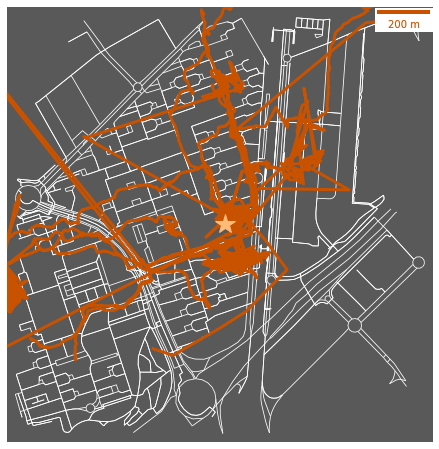

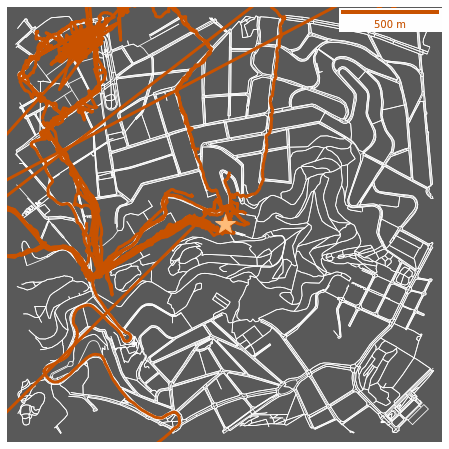

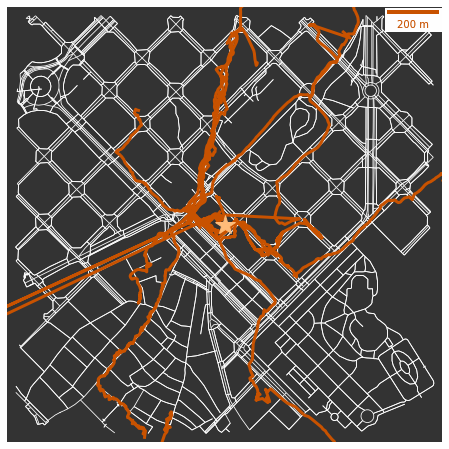

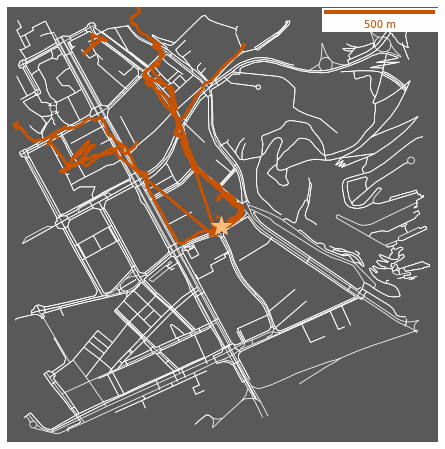

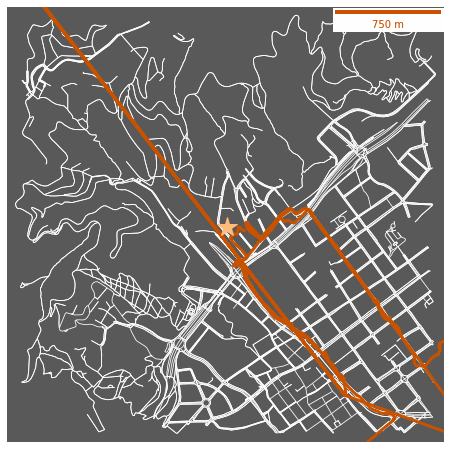

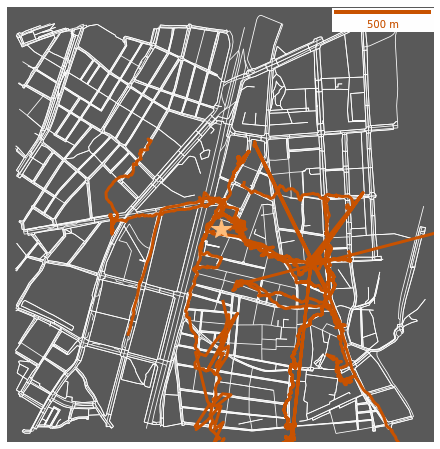

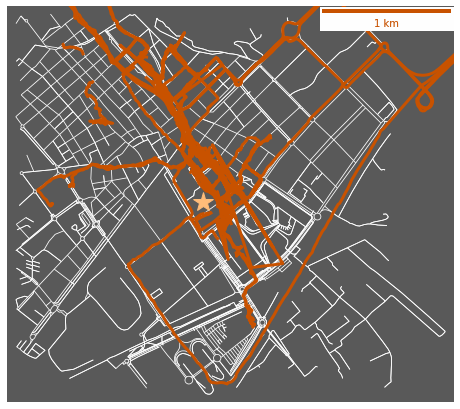

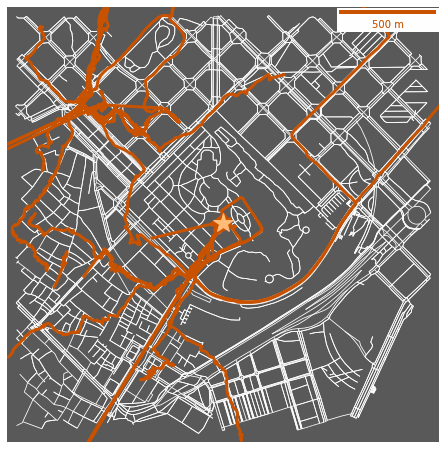

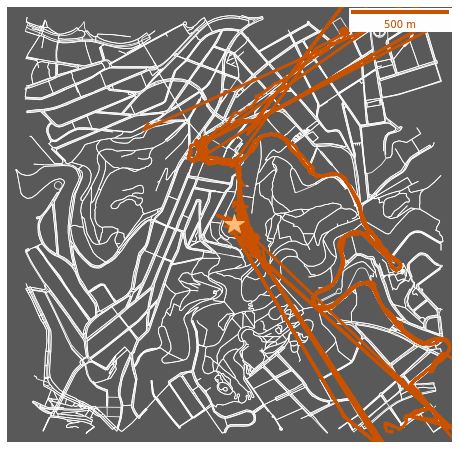

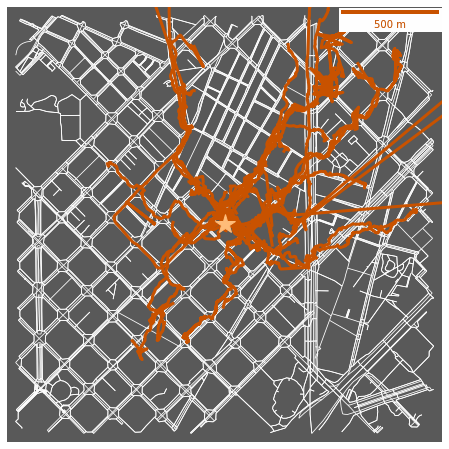

In [12]:
# Creeate the 10 graphs, corresponding to the 10 schools (from the GPS locs. of the school)

G = ox.graph_from_point((41.35235200502914,2.113816770757186), dist=600, network_type='all')   
fig1,ax1=ox.plot_graph(G,show=False,figsize=(8, 8), close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)   # The figure                              # the GPS coord. of the school

G2 = ox.graph_from_point((41.420564958735746,2.163415271026687), dist=800, network_type='all')  
fig2,ax2=ox.plot_graph(G2,show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G3 = ox.graph_from_point((41.39132880943077,2.1818982284844233), dist=600, network_type='all')   
fig3, ax3 = ox.plot_graph(G3, show=False, close=False, bgcolor="#333333",edge_color="w", edge_linewidth=0.8, node_size=0)   # The figure                              # the GPS coord. of the school

G4 = ox.graph_from_point((41.35494140513381,2.1452223996199606), dist=700, network_type='all')   
fig4, ax4 = ox.plot_graph(G4, show=False,figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)   

G5 = ox.graph_from_point((41.40677369723576, 2.11714250757789), dist=1100, network_type='all')  
fig5, ax5 = ox.plot_graph(G5, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G6 = ox.graph_from_point((41.438799787779836,2.1861537718363393), dist=800, network_type='all')   
fig6, ax6 = ox.plot_graph(G6, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G7 = ox.graph_from_point((41.31367857092018,2.0233411472684057), dist=1100, network_type='all')  
fig7, ax7 = ox.plot_graph(G7, show=False,figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G8 = ox.graph_from_point((41.38749600935387,2.1872744707565692), dist=800, network_type='all')   
fig8, ax8 = ox.plot_graph(G8, show=False,figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G9 = ox.graph_from_point((41.41807351313676,2.151552970756794), dist=800, network_type='all')  
fig9, ax9 = ox.plot_graph(G9, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G10 = ox.graph_from_point((41.410089011953914, 2.182907699619366), dist=800, network_type='all')  
fig10, ax10 = ox.plot_graph(G10, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)


# Make list of paths (csv files for all individuals) and loop over all .csv files in the folder
# NOTE: MAKE SURE TO INTRODUCE THE CORRECT PATH (USING THE "original data"  FOLDER)

all_files = glob.glob(os.path.join("*.csv")) 
for file in all_files:   
    df = pd.read_csv(file)  # Read the csv file of each user
    lat=df['latitude'].tolist()  # Latitude and Longitude to lists
    lon=df['longitude'].tolist()
    
    # Scatter the GPS locs of each school
    if ('bel') in file:
        ax1.plot(lon, lat, '-', c='#C85200',linewidth=3)
        
        lon_min=ax1.get_xlim()[0]   # This code is used to add the Scale Bar of the Map in metres.
        lon_max=ax1.get_xlim()[1]
        lat_min=ax1.get_ylim()[0]
        lat_max=ax1.get_ylim()[1]
        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]
        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax1.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('ift') in file:
        ax2.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax2.get_xlim()[0]
        lon_max=ax2.get_xlim()[1]
        lat_min=ax2.get_ylim()[0]
        lat_max=ax2.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax2.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('ipc') in file:
        ax3.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax3.get_xlim()[0]
        lon_max=ax3.get_xlim()[1]
        lat_min=ax3.get_ylim()[0]
        lat_max=ax3.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax3.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))        
        
        
    if ('mon') in file:
        ax4.plot(lon, lat, '-', c='#C85200',linewidth=3)
        lon_min=ax4.get_xlim()[0]
        lon_max=ax4.get_xlim()[1]
        lat_min=ax4.get_ylim()[0]
        lat_max=ax4.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax4.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('oak') in file:
        ax5.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax5.get_xlim()[0]
        lon_max=ax5.get_xlim()[1]
        lat_min=ax5.get_ylim()[0]
        lat_max=ax5.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax5.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('san') in file:
        ax6.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax6.get_xlim()[0]
        lon_max=ax6.get_xlim()[1]
        lat_min=ax6.get_ylim()[0]
        lat_max=ax6.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax6.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('sgv') in file:
        ax7.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax7.get_xlim()[0]
        lon_max=ax7.get_xlim()[1]
        lat_min=ax7.get_ylim()[0]
        lat_max=ax7.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax7.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('ver') in file:
        ax8.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax8.get_xlim()[0]
        lon_max=ax8.get_xlim()[1]
        lat_min=ax8.get_ylim()[0]
        lat_max=ax8.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax8.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('vir') in file:
        ax9.plot(lon, lat, '-', c='#C85200',linewidth=3)
        lon_min=ax9.get_xlim()[0]
        lon_max=ax9.get_xlim()[1]
        lat_min=ax9.get_ylim()[0]
        lat_max=ax9.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax9.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('zaf') in file:
        ax10.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax10.get_xlim()[0]
        lon_max=ax10.get_xlim()[1]
        lat_min=ax10.get_ylim()[0]
        lat_max=ax10.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax10.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))

# Plot a yellow star in the school location
ax1.plot(2.113816770757186,41.35235200502914, marker='*', c='#FFBC79', markersize=20)
ax2.plot(2.163415271026687,41.420564958735746, marker='*', c='#FFBC79', markersize=20)
ax3.plot(2.1818982284844233,41.3913288094307, marker='*', c='#FFBC79', markersize=20)
ax4.plot(2.1452223996199606,41.35494140513381, marker='*', c='#FFBC79', markersize=20)
ax5.plot(2.11714250757789,41.40677369723576, marker='*', c='#FFBC79', markersize=20)
ax6.plot(2.1861537718363393,41.438799787779836, marker='*', c='#FFBC79', markersize=20)
ax7.plot(2.0233411472684057,41.31367857092018, marker='*', c='#FFBC79', markersize=20)
ax8.plot(2.1872744707565692,41.38749600935387, marker='*', c='#FFBC79', markersize=20)
ax9.plot(2.151552970756794,41.41807351313676, marker='*', c='#FFBC79', markersize=20)
ax10.plot(2.182907699619366,41.410089011953914, marker='*', c='#FFBC79', markersize=20)


# Save the 10 figures
#fig1.savefig('bel_original.pdf',format='pdf', bbox_inches='tight')
#fig2.savefig('ift_original.pdf',format='pdf', bbox_inches='tight')
#fig3.savefig('ipc_original.pdf',format='pdf', bbox_inches='tight')
#fig4.savefig('mon_original.pdf',format='pdf', bbox_inches='tight')
#fig5.savefig('oak_original.pdf',format='pdf', bbox_inches='tight')
#fig6.savefig('san_original.pdf',format='pdf', bbox_inches='tight')
#fig7.savefig('sgv_original.pdf',format='pdf', bbox_inches='tight')
#fig8.savefig('ver_original.pdf',format='pdf', bbox_inches='tight')
#fig9.savefig('vir_original.pdf',format='pdf', bbox_inches='tight')
#fig10.savefig('zaf_original.pdf',format='pdf', bbox_inches='tight')

plt.show()
    
    

## 1.2- Map of all journeys

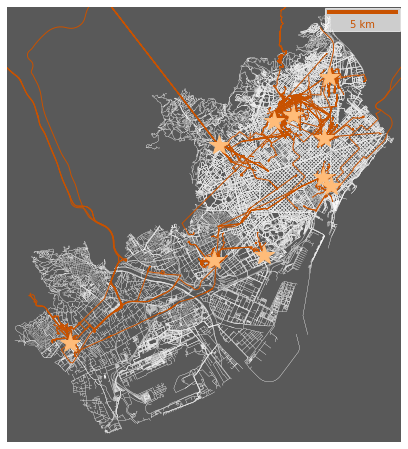

In [15]:
# Create the whole map of Barcelona Metropolitan Area
place_name = ["Barcelona, Barcelona, Spain", "Hospitalet de Llobregat, Spain","Cornellà de Llobregat, Spain" ,
              "El Prat de Llobregat, Spain", "Sant Boi de Llobregat, Spain","Viladecans, Spain"]
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph,show=False, close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.2, node_size=0)

# Make list of paths (csv files for all individuals) and loop over all .csv files in the folder
# NOTE: MAKE SURE TO INTRODUCE THE CORRECT PATH (USING THE "original data"  FOLDER)

all_files = glob.glob(os.path.join("*.csv")) 
for file in all_files:    
    df = pd.read_csv(file)  # Read the csv file of each user
    lat=df['latitude'].tolist()  # Latitude and Longitude to lists
    lon=df['longitude'].tolist()
    
    ax.plot(lon, lat, '-', c='#C85200',linewidth=1) # Scatter the GPS locs
        
# scatter a yellow star in each school location
ax.plot(2.113816770757186,41.35235200502914, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.163415271026687,41.420564958735746, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.1818982284844233,41.3913288094307, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.1452223996199606,41.35494140513381, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.11714250757789,41.40677369723576, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.1861537718363393,41.438799787779836, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.0233411472684057,41.31367857092018, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.1872744707565692,41.38749600935387, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.151552970756794,41.41807351313676, marker='*', c='#FFBC79', markersize=20)
ax.plot(2.182907699619366,41.410089011953914, marker='*', c='#FFBC79', markersize=20)


lon_min=ax.get_xlim()[0]
lon_max=ax.get_xlim()[1]
lat_min=ax.get_ylim()[0]
lat_max=ax.get_ylim()[1]

A=[lon_min*np.pi/180., lat_min*np.pi/180.]
B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

dx=(6371000)*haversine_distances([A,B])[0,1]
ax.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))

# Save the figure
#fig.savefig('map_tots.pdf',format='pdf', bbox_inches='tight')

plt.show()

# 2. Data processing and cleaning

## 2.1- Remove non-pedestrian journeys

We remove all non-pedestrian journeys for this study, by looking at the nickname of each participant, where the means of transport is indicated.

Ex:  2018-11-05_sgv_1302_bus.csv


In this example, the participant used the bus as the transport method. Some participants did not indicate the means of transport in the nickname and the statistics (distances and velocities) suggests that the participant used another means of transport rather than walking. 

A total number of 105 non-pedestrian journeys are removed in this first stage, corresponding to 83,009 GPS locations.

## 2.2- Remove invalid journeys

There are also several journey records which do not follow a clear trajectory, possibly due to problems with the app or with GPS satellites connection. Invalid journeys are also due to human error when recording the route. These records are removed jointly with those that neither start nor end in one the schools. 

This second step has allowed to remove a total amount of 7,500 GPS locations, corresponding to 43 participants.



### 2.2.1- Example of invalid journey

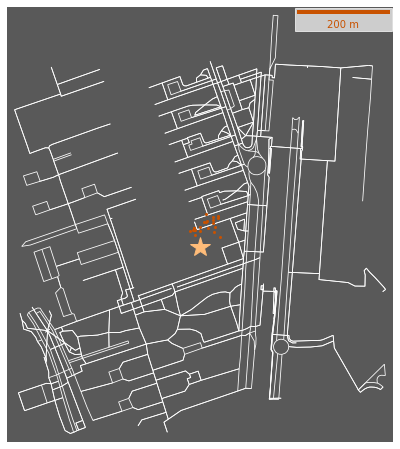

In [8]:
# Read the .csv original file
# NOTE: USE THE CORRECT PATH OF THE ORIGINAL FILE (Original data folder)
df = pd.read_csv('2018-11-08_bell9283.csv')  

# Latitude and Longitude to lists
lat=df['latitude'].tolist()  
lon=df['longitude'].tolist()

# Create the graph from the GPS coordenates of the school (Bellvitge)
G = ox.graph_from_point((41.35235405944773, 2.113842233748729), dist=300, network_type='all')  
fig, ax = ox.plot_graph(G, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8,
                        node_size=0)  

# Plot a yellow star in the school location
ax.plot(2.113842233748729,41.35235405944773, marker='*', c='#FFBC79', markersize=20)

# Scatter the GPS locs.
ax.plot(lon, lat, 'o', c='#C85200',markersize=2)

# Scale bar of distances. Get the limits (coordinates) and then calculate the Haversine distance between a given latitude (min.)
# and the min. and max. longitudes. This creates a measure of the scale of the map. 
lon_min=ax.get_xlim()[0]
lon_max=ax.get_xlim()[1]
lat_min=ax.get_ylim()[0]
lat_max=ax.get_ylim()[1]

A=[lon_min*np.pi/180., lat_min*np.pi/180.]
B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

dx=(6371000)*haversine_distances([A,B])[0,1] # Haversine distance
ax.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white')) # Add ScaleBar

# Save the map in pdf format.
#fig.savefig('bel_invalid_journey.pdf',format='pdf', bbox_inches='tight')

plt.show()

### 2.2.2- Example of non origin-destination journey

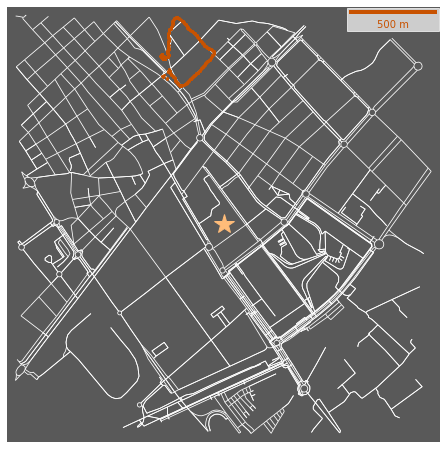

In [11]:
# Read the .csv original file
# NOTE: USE THE CORRECT PATH OF THE ORIGINAL FILE (Original data folder)
df = pd.read_csv('2018-11-05_sgv_0602_peu.csv')

# Latitude and Longitude to lists
lat=df['latitude'].tolist()  
lon=df['longitude'].tolist()

# Create the graph from the GPS coordenates of the school (SGV)
G = ox.graph_from_point((41.31367857092018,2.0233411472684057), dist=900, network_type='all')  
fig, ax = ox.plot_graph(G, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8,
                        node_size=0)  

# Plot a yellow star in the school location
ax.plot(2.0233411472684057,41.31367857092018, marker='*', c='#FFBC79', markersize=20)

# Scatter the GPS locs.
ax.plot(lon, lat, 'o', c='#C85200',markersize=2)

# Scale bar of distances. Get the limits (coordinates) and then calculate the Haversine distance between a given latitude (min.)
# and the min. and max. longitudes. This creates a measure of the scale of the map. 
lon_min=ax.get_xlim()[0]
lon_max=ax.get_xlim()[1]
lat_min=ax.get_ylim()[0]
lat_max=ax.get_ylim()[1]

A=[lon_min*np.pi/180., lat_min*np.pi/180.]
B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

dx=(6371000)*haversine_distances([A,B])[0,1] # Haversine distance
ax.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white')) # Add ScaleBar

# Save the map in pdf format.
#fig.savefig('sgv_invalid_journey.pdf',format='pdf', bbox_inches='tight')

plt.show()

## 2.3- Remove outliers

We clean each journey from the possible outliers that may appear (specially at the initial/end of the trajectory) due to the gps connexion or so.

There are certain individual journeys which contain too many outliers, thus making impossible to create a meaning origin-destination trajectory once the outliers are removed. This has led us to discard the whole journey, therefore reducing the total number of journeys even further. In particular, 31 complete journeys are removed and the total number of GPS outliers removed is 34,409. 

Therefore, we ended up with 83 individual journeys and a total amount of 36, 091 records.


### 2.3.1- Example of removing outliers from a journey

In this example, some outliers appear at the beginning of the trajectory (in the school), which are associated to large values of distances and velocities that need to be removed.

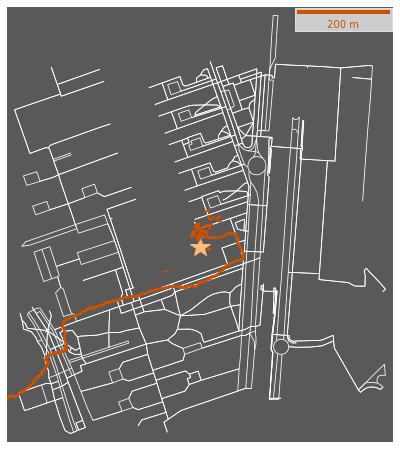

In [17]:
# Read the .csv original file
# NOTE: USE THE CORRECT PATH OF THE ORIGINAL FILE (Original data folder)
df = pd.read_csv('2018-11-08_bel_1313_peu.csv')  

# Latitude and Longitude to lists
lat=df['latitude'].tolist()  
lon=df['longitude'].tolist()

# Create the graph from the GPS coordenates of the school (Bellvitge)
G = ox.graph_from_point((41.35235405944773, 2.113842233748729), dist=300, network_type='all')  
fig, ax = ox.plot_graph(G, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8,
                        node_size=0)  

# Plot a yellow star in the school location
ax.plot(2.113842233748729,41.35235405944773, marker='*', c='#FFBC79', markersize=20)

# Scatter the GPS locs.
ax.plot(lon, lat, 'o', c='#C85200',markersize=2)

# Scale bar of distances. Get the limits (coordinates) and then calculate the Haversine distance between a given latitude (min.)
# and the min. and max. longitudes. This creates a measure of the scale of the map. 
lon_min=ax.get_xlim()[0]
lon_max=ax.get_xlim()[1]
lat_min=ax.get_ylim()[0]
lat_max=ax.get_ylim()[1]

A=[lon_min*np.pi/180., lat_min*np.pi/180.]
B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

dx=(6371000)*haversine_distances([A,B])[0,1] # Haversine distance
ax.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white')) # Add ScaleBar

# Save the map in pdf format.
#fig.savefig('bel_outlier.pdf',format='pdf', bbox_inches='tight')

plt.show()

#### Time increment, euclidean distance and instantaneous velocity

We observe peaks of >80m/s of the velocity at the beginning of the trajectory

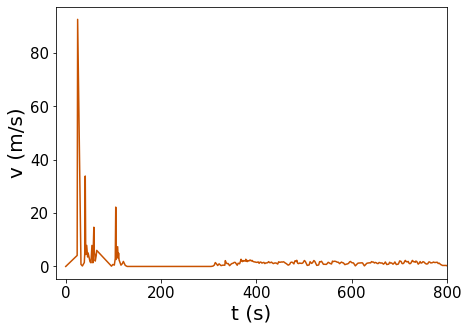

In [19]:
# Time increment (in seconds) between consecutive GPS locations. At(i)= time(i+1)-time(i)
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
temps=df['time'].tolist()
diff_time=[]
for i in range(1,len(df['time'])):
    diff=temps[i]-temps[i-1]
    diff_time.append(diff)
diff_time.insert(len(diff_time), np.nan)   # Insert NaN value for the last element of the list.
df['At']=diff_time
df['At']=df['At'].dt.seconds     # Add time increment column

time=df['At'].tolist()
latitude=df['latitude'].tolist()
longitude=df['longitude'].tolist()


# Distance (in metres) between consecutive GPS locations. Harvesine formula. d(i)= d(i+1, i)
distance=[]
for j in range(1,len(latitude)):
    dist=getDistanceFromLatLonInM(latitude[j-1],longitude[j-1],latitude[j],longitude[j])
    distance.append(dist)

    
# Instantaneous velocity (in metres/second) between consecutive GPS locations. v(i)= d(i) / At(i)
velocity=[]
for jj in range(len(distance)):
    velocity.append(distance[jj]/time[jj])
    
distance.insert(len(distance), np.nan) # Insert NaN value for the last element of the list.
velocity.insert(len(velocity), np.nan) # Insert NaN value for the last element of the list.
df['d']=distance # Add distance column
df['v']=velocity # Add velocity column


index_to_be_deleted = df[ df['At'] >= 80000 ].index  # Remove temporal values greater than 80.000, which are impossible
df.drop(index_to_be_deleted,inplace=True)



# PLOT THE TEMPORAL SERIES OF THE INSTANTANEOUS VELOCITY 
velocitat=df['v'][:-1].tolist()
temporal_axis=df['At'][:-1].cumsum(axis = 0).tolist()
temporal_axis.insert(0, 0)
velocitat.insert(0, 0)

fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(temporal_axis, velocitat, '-',c='#C85200', label='data')    #plot v vs At.
ax.set_xlabel('t (s)',fontsize=20)
ax.set_ylabel('v (m/s)',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xlim(-20,800)

#fig.savefig('bel_outlier2.pdf',format='pdf', bbox_inches='tight')

plt.show()


#### Remove outliers

We cut the first 115 records in order to remove the outliers at the beginning. The 115 is chosen after carefully analyzing the data-frame and the velocity/distance outliers.


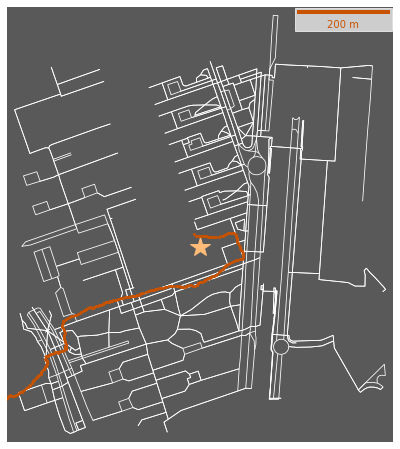

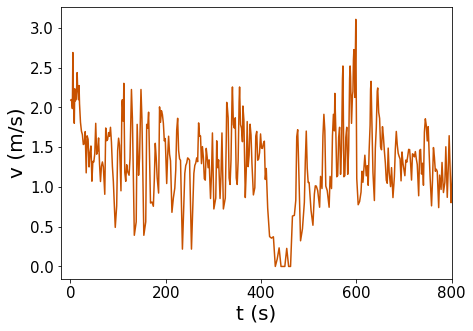

In [20]:
df2=df[115:].copy()

lat=df2['latitude'].tolist()  # Latitude and Longitude to lists
lon=df2['longitude'].tolist()

# Create the graph from the GPS coord. of the school
G = ox.graph_from_point((41.35235405944773, 2.113842233748729), dist=300, network_type='all')
fig, ax = ox.plot_graph(G, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, 
                        node_size=0) 
ax.plot(2.113842233748729,41.35235405944773, marker='*', c='#FFBC79', markersize=20)
ax.plot(lon, lat, 'o', c='#C85200',markersize=2) # Scatter the GPS locs. 


lon_min=ax.get_xlim()[0]
lon_max=ax.get_xlim()[1]
lat_min=ax.get_ylim()[0]
lat_max=ax.get_ylim()[1]
A=[lon_min*np.pi/180., lat_min*np.pi/180.]
B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]
dx=(6371000)*haversine_distances([A,B])[0,1]
ax.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))

#fig.savefig('bel_outlier3.pdf',format='pdf', bbox_inches='tight')
plt.show()



# PLOT TEMPORAL SERIES OF THE VELOCITY
velocitat=df2['v'][:-1].tolist()
temporal_axis=df2['At'][:-1].cumsum(axis = 0).tolist()
fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(temporal_axis, velocitat, '-',c='#C85200', label='data')    #plot v vs At.
ax.set_xlabel('t (s)',fontsize=20)
ax.set_ylabel('v (m/s)',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xlim(-20,800)

#fig.savefig('bel_outlier4.pdf',format='pdf', bbox_inches='tight')

plt.show()


## 2.4- Save processed files

After the three stages described above, the new .csv processed files are saved in the "processed data" folder. Three new columns are added, corresponding to the time increment, distance and velocity between consecutive GPS locations (see code above).


In [21]:
# Example of saving a processed csv file

#df.to_csv("2018-11-08_bell_121_peu.csv",index=False)

# 3. Map representation. Processed data

## 3.1- Map of journeys for each school

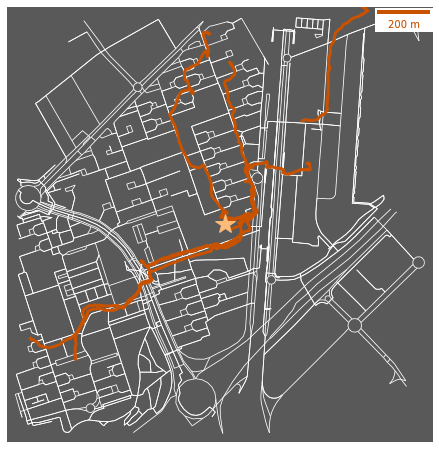

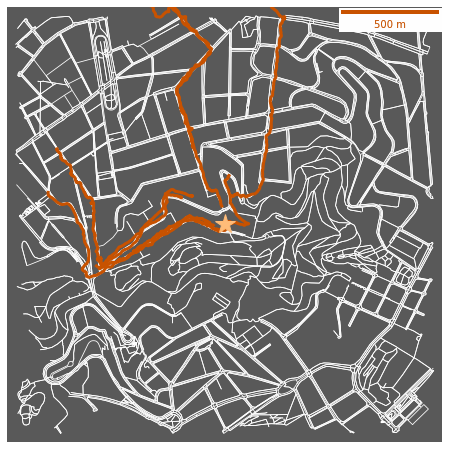

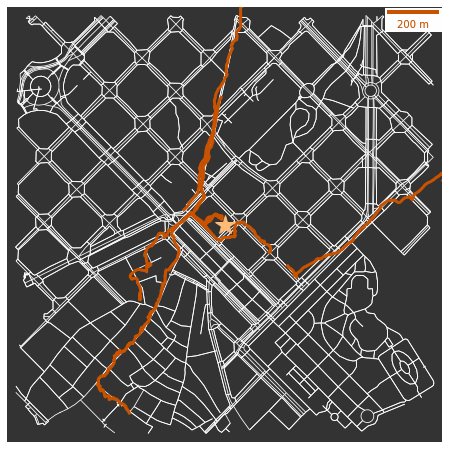

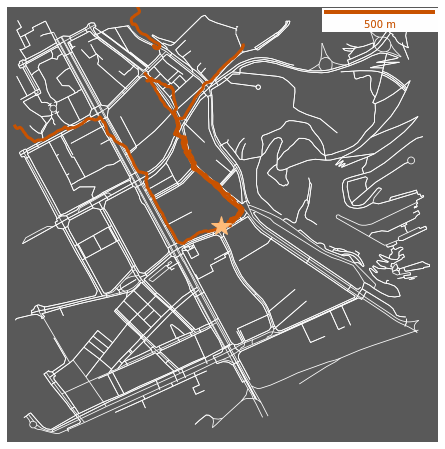

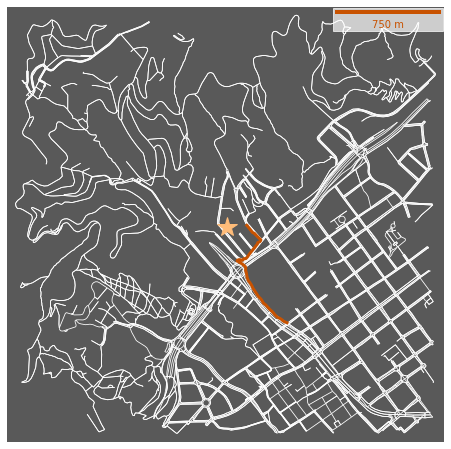

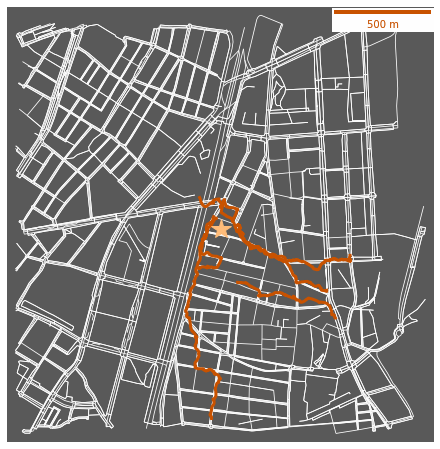

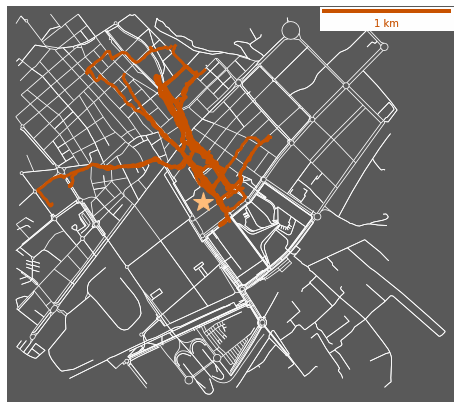

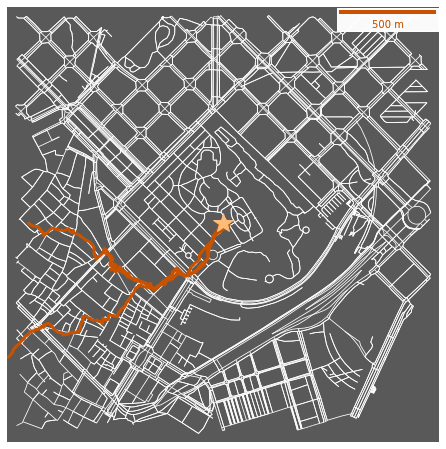

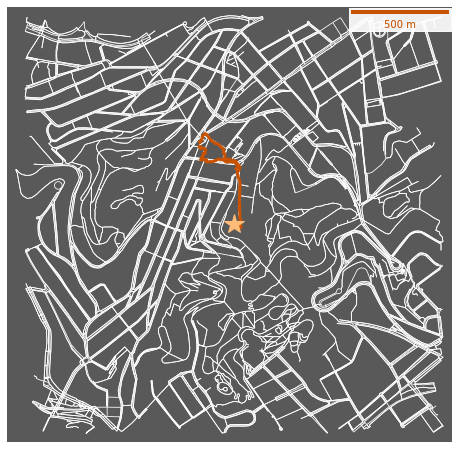

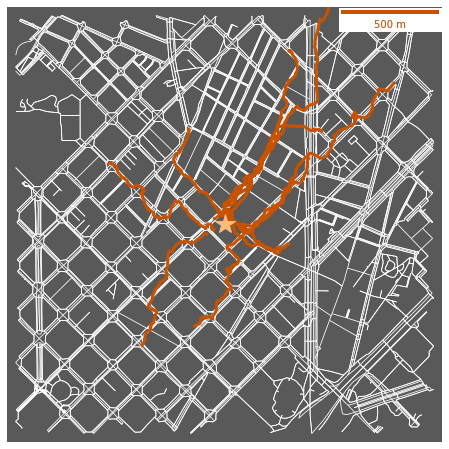

In [22]:
# Creeate the 10 graphs, corresponding to the 10 schools (from the GPS locs. of the school)

G = ox.graph_from_point((41.35235200502914,2.113816770757186), dist=600, network_type='all')   
fig1,ax1=ox.plot_graph(G,show=False,figsize=(8, 8), close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)   # The figure                              # the GPS coord. of the school

G2 = ox.graph_from_point((41.420564958735746,2.163415271026687), dist=800, network_type='all')  
fig2,ax2=ox.plot_graph(G2,show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G3 = ox.graph_from_point((41.39132880943077,2.1818982284844233), dist=600, network_type='all')   
fig3, ax3 = ox.plot_graph(G3, show=False, close=False, bgcolor="#333333",edge_color="w", edge_linewidth=0.8, node_size=0)   # The figure                              # the GPS coord. of the school

G4 = ox.graph_from_point((41.35494140513381,2.1452223996199606), dist=700, network_type='all')   
fig4, ax4 = ox.plot_graph(G4, show=False,figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)   

G5 = ox.graph_from_point((41.40677369723576, 2.11714250757789), dist=1100, network_type='all')  
fig5, ax5 = ox.plot_graph(G5, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G6 = ox.graph_from_point((41.438799787779836,2.1861537718363393), dist=800, network_type='all')   
fig6, ax6 = ox.plot_graph(G6, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G7 = ox.graph_from_point((41.31367857092018,2.0233411472684057), dist=1100, network_type='all')  
fig7, ax7 = ox.plot_graph(G7, show=False,figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G8 = ox.graph_from_point((41.38749600935387,2.1872744707565692), dist=800, network_type='all')   
fig8, ax8 = ox.plot_graph(G8, show=False,figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G9 = ox.graph_from_point((41.41807351313676,2.151552970756794), dist=800, network_type='all')  
fig9, ax9 = ox.plot_graph(G9, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)

G10 = ox.graph_from_point((41.410089011953914, 2.182907699619366), dist=800, network_type='all')  
fig10, ax10 = ox.plot_graph(G10, show=False, figsize=(8, 8),close=False, bgcolor="#595959",edge_color="w", edge_linewidth=0.8, node_size=0)


# Make list of paths (csv files for all individuals) and loop over all .csv files in the folder
# NOTE: MAKE SURE TO INTRODUCE THE CORRECT PATH (USING THE "original data"  FOLDER)

all_files = glob.glob(os.path.join("*.csv")) 
for file in all_files:   
    df = pd.read_csv(file)  # Read the csv file of each user
    lat=df['latitude'].tolist()  # Latitude and Longitude to lists
    lon=df['longitude'].tolist()
    
    # Scatter the GPS locs of each school
    if ('bel') in file:
        ax1.plot(lon, lat, '-', c='#C85200',linewidth=3)
        
        lon_min=ax1.get_xlim()[0]   # This code is used to add the Scale Bar of the Map in metres.
        lon_max=ax1.get_xlim()[1]
        lat_min=ax1.get_ylim()[0]
        lat_max=ax1.get_ylim()[1]
        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]
        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax1.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('ift') in file:
        ax2.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax2.get_xlim()[0]
        lon_max=ax2.get_xlim()[1]
        lat_min=ax2.get_ylim()[0]
        lat_max=ax2.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax2.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('ipc') in file:
        ax3.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax3.get_xlim()[0]
        lon_max=ax3.get_xlim()[1]
        lat_min=ax3.get_ylim()[0]
        lat_max=ax3.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax3.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))        
        
        
    if ('mon') in file:
        ax4.plot(lon, lat, '-', c='#C85200',linewidth=3)
        lon_min=ax4.get_xlim()[0]
        lon_max=ax4.get_xlim()[1]
        lat_min=ax4.get_ylim()[0]
        lat_max=ax4.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax4.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('oak') in file:
        ax5.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax5.get_xlim()[0]
        lon_max=ax5.get_xlim()[1]
        lat_min=ax5.get_ylim()[0]
        lat_max=ax5.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax5.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('san') in file:
        ax6.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax6.get_xlim()[0]
        lon_max=ax6.get_xlim()[1]
        lat_min=ax6.get_ylim()[0]
        lat_max=ax6.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax6.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('sgv') in file:
        ax7.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax7.get_xlim()[0]
        lon_max=ax7.get_xlim()[1]
        lat_min=ax7.get_ylim()[0]
        lat_max=ax7.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax7.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('ver') in file:
        ax8.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax8.get_xlim()[0]
        lon_max=ax8.get_xlim()[1]
        lat_min=ax8.get_ylim()[0]
        lat_max=ax8.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax8.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('vir') in file:
        ax9.plot(lon, lat, '-', c='#C85200',linewidth=3)
        lon_min=ax9.get_xlim()[0]
        lon_max=ax9.get_xlim()[1]
        lat_min=ax9.get_ylim()[0]
        lat_max=ax9.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax9.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))
        
        
    if ('zaf') in file:
        ax10.plot(lon, lat, '-', c='#C85200',linewidth=3) 
        lon_min=ax10.get_xlim()[0]
        lon_max=ax10.get_xlim()[1]
        lat_min=ax10.get_ylim()[0]
        lat_max=ax10.get_ylim()[1]

        A=[lon_min*np.pi/180., lat_min*np.pi/180.]
        B=[(lon_min+1)*np.pi/180., lat_min*np.pi/180.]

        dx=(6371000)*haversine_distances([A,B])[0,1]
        ax10.add_artist(ScaleBar(dx=dx, units='m',color='#C85200',length_fraction=0.3,box_alpha=0.7, box_color='white'))

# Plot a yellow star in the school location
ax1.plot(2.113816770757186,41.35235200502914, marker='*', c='#FFBC79', markersize=20)
ax2.plot(2.163415271026687,41.420564958735746, marker='*', c='#FFBC79', markersize=20)
ax3.plot(2.1818982284844233,41.3913288094307, marker='*', c='#FFBC79', markersize=20)
ax4.plot(2.1452223996199606,41.35494140513381, marker='*', c='#FFBC79', markersize=20)
ax5.plot(2.11714250757789,41.40677369723576, marker='*', c='#FFBC79', markersize=20)
ax6.plot(2.1861537718363393,41.438799787779836, marker='*', c='#FFBC79', markersize=20)
ax7.plot(2.0233411472684057,41.31367857092018, marker='*', c='#FFBC79', markersize=20)
ax8.plot(2.1872744707565692,41.38749600935387, marker='*', c='#FFBC79', markersize=20)
ax9.plot(2.151552970756794,41.41807351313676, marker='*', c='#FFBC79', markersize=20)
ax10.plot(2.182907699619366,41.410089011953914, marker='*', c='#FFBC79', markersize=20)


# Save the 10 figures
#fig1.savefig('bel_processed.pdf',format='pdf', bbox_inches='tight')
#fig2.savefig('ift_processed.pdf',format='pdf', bbox_inches='tight')
#fig3.savefig('ipc_processed.pdf',format='pdf', bbox_inches='tight')
#fig4.savefig('mon_processed.pdf',format='pdf', bbox_inches='tight')
#fig5.savefig('oak_processed.pdf',format='pdf', bbox_inches='tight')
#fig6.savefig('san_processed.pdf',format='pdf', bbox_inches='tight')
#fig7.savefig('sgv_processed.pdf',format='pdf', bbox_inches='tight')
#fig8.savefig('ver_processed.pdf',format='pdf', bbox_inches='tight')
#fig9.savefig('vir_processed.pdf',format='pdf', bbox_inches='tight')
#fig10.savefig('zaf_processed.pdf',format='pdf', bbox_inches='tight')

plt.show()
    
    

# 4. Linear Interpolation

We are interested in to have all the data separated uniformly in time (1 second). For this reason, we interpolate linearly the data to predict the geo-locations at those "temporal gaps" where the time difference is greater than 1 second.
    
In other words, if two geolocations are separated by more than 1 second (for instance, two seconds) we perform a linear interpolation, creating the time in between with the new geolocation.
    
To do that, we must first convert the time column into index, then resample it to every 1 second, and fullfil the rows of geolocations that are missing predicting the values with a straight line.

The final data-set for each user contains the data separated by one second and three new columns corresponding to the time difference between geo-locations, the Haversine/Euclidean distance and the instantaneous velocity


In [9]:
# Make list of paths for all the csv files (each user)
# NOTE: make sure to use the correct path (in this case the processed data in "processed data" folder)

all_files = glob.glob(os.path.join("*.csv"))

for file in all_files:
    df = pd.read_csv(file) #read the file     
    df2=df.copy() 

    df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
    df2.index = df2['time']  # Then convert the column time into index

    del df2['time']  # delete all the columns of the dataframe less the coordinates (latitude and longitude)
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    df2=df2.resample('1S').asfreq().interpolate()     # Resample the index of times every 1 second (1S) and interpolate linearly
    df2.reset_index(level=0, inplace=True)            # the missing values of the latitude and longitude. Then reset index.

    
    At=[]     # We calculate again the time difference between geolocations, the Harvesine distance and the velocity.
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At
    df2['d']=distance
    df2['v']=df2['d']/df2['At']
    
    file2=os.path.splitext(file)[0]           # Save new .csv file for each user with the extension "interpolated"
    #df2.to_csv(file2+'_interpolated.csv')

## 4.1. Statistics of temporal gaps At>1

The app. is designed to collect data every second ($\Delta t=1s$). However, a considerable portion of the data is collected every more seconds ($\Delta t>1s$). The 83% is collected every 1s, the 12% every 2s, the 2% every 3s... Actually the 99'8% of the data is collected every $\Delta t \leq 4s$. 

However there are still greater temporal gaps ($\Delta t$=5,6,7,...,20,23,44) but they are statistically irrelevant. 

We compute the statistics (distances and velocities) considering those temporal gaps that are less than a certain value. That is $\Delta t \leq X$ seconds. So if $\Delta t \leq 1s$, we only use the velocities and distances corresponding to those points that are separated only by 1s. Then, for $\Delta t \leq 2s$, those points separated by 1 or 2 seconds at maximum. Then we study $\Delta t \leq 3,4,5,6,...,10 s.$

In [6]:
Ats=[]

all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

for file in all_files:   # Loop over all csv files in the folder/directory 
    df = pd.read_csv(file)  # Read the csv file of each user
    t=df['At'][:-1].tolist()  # Time diff to list
    Ats.extend(t)   # Extend all time difference lists into a single one


df_times=pd.DataFrame()   # Data-Frame with only the values of time difference At
df_times['Ats']=Ats

values = df_times['Ats'].value_counts(normalize=True).mul(100).keys().tolist()
counts = df_times['Ats'].value_counts(normalize=True).mul(100).tolist()

df_times.value_counts(normalize=True).mul(100)      # frequency in % of temporal the different temporal gaps



Ats 
1.0     82.803821
2.0     13.210953
3.0      2.321706
4.0      1.416352
5.0      0.091646
7.0      0.036103
6.0      0.033326
10.0     0.019440
12.0     0.013886
8.0      0.011109
11.0     0.011109
9.0      0.008331
16.0     0.005554
23.0     0.005554
13.0     0.002777
14.0     0.002777
15.0     0.002777
20.0     0.002777
dtype: float64

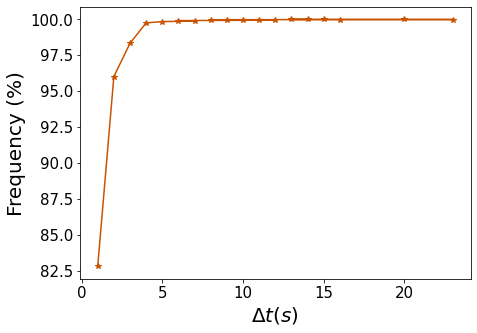

In [7]:
# Plot cumulative function

sm=0
cum_list=[]
for i in counts:
    sm=sm+i
    cum_list.append(sm)
    
fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(values, cum_list, '*-', c='#C85200')    #plot pdf cumulative
ax.set_xlabel(r'$\Delta t (s)$',fontsize=20)
ax.set_ylabel('Frequency (%)',fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

## 4.2. Velocities. Box Plot

We obtain the statistics (mean value, standard deviation, quantiles) and the box plot for the velocities considering only those geo-locatios separated by a certain amount of seconds $\Delta t = X$ (begin X=1,2,3,4 or 5 seconds).



At=1
<v>= 1.5864505806813256  std= 0.7726130334322872  e= 0.00447442610622402
min v= 0.2007126449931674  max v= 8.566491492517326
29816
q1 (25%): 1.1019382258071913 m/s
q2 (50%): 1.4745661737442397 m/s
q3 (75%): 1.9317597083973663 m/s

-------------------------------------------------------------

At=2
<v>= 1.3877840888174904  std= 0.4579486256212219  e= 0.006639726404339496
min v= 0.1002427285187354  max v= 6.020869697206608
4757
q1 (25%): 1.168333948378262 m/s
q2 (50%): 1.4137480501386015 m/s
q3 (75%): 1.6598607077920249 m/s

-------------------------------------------------------------

At=3
<v>= 0.7964398814105804  std= 0.34447616541722187  e= 0.011913957303810743
min v= 0.0099368648140498  max v= 3.3910718982863526
836
q1 (25%): 0.6898513575578777 m/s
q2 (50%): 0.8477848868771614 m/s
q3 (75%): 0.9811127641147044 m/s

-------------------------------------------------------------

At=4
<v>= 0.40154845921071247  std= 0.2999221693973719  e= 0.01328077688608953
min v= 0.00575670827726

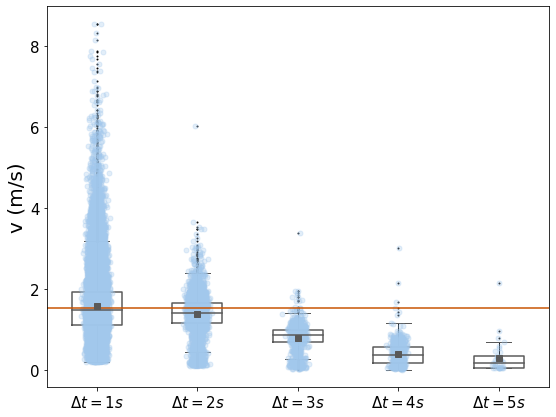

In [15]:
P.figure(figsize=(9,7))

all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


v_At1=[]
v_At2=[]
v_At3=[]        # list of velocities of At=X seconds.
v_At4=[]
v_At5=[]
velocities=[]

for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # Velocities of the participant to list (we remove the last element which is NaN)
    
    velocities_At1=[]
    velocities_At2=[]
    velocities_At3=[]
    velocities_At4=[]
    velocities_At5=[]
    
    velocities.extend(v)  # all the velocities 
    
    for p in range(len(v)):       # Loop for each user, we store the velocities that fulfill At=X seconds, being X=1,2,3,4 or 5 
        if df2['At'][p]==1:
            velocities_At1.append(v[p])
        if df2['At'][p]==2:
            velocities_At2.append(v[p])
        if df2['At'][p]==3:
            velocities_At3.append(v[p])
        if df2['At'][p]==4:
            velocities_At4.append(v[p])
        if df2['At'][p]==5:
            velocities_At5.append(v[p])

            
    v_At1.extend(velocities_At1)      # Put all the lists for all users in an unique list
    v_At2.extend(velocities_At2)
    v_At3.extend(velocities_At3)
    v_At4.extend(velocities_At4)
    v_At5.extend(velocities_At5)

    
    
# For each At=1,2,3,4 or 5. Compute the mean, std and quartiles for the velocities. 
print('')
print('At=1')
mean = sum(v_At1) / len(v_At1)
variance = sum([((x - mean) ** 2) for x in v_At1]) / len(v_At1)
res = variance ** 0.5
error=res/(len(v_At1)**0.5)

print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(v_At1),'', 'max v=',max(v_At1))
print(len(v_At1))
q1=np.quantile(v_At1, 0.25)
q2=np.quantile(v_At1, 0.50)
q3=np.quantile(v_At1, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('At=2')
mean2 = sum(v_At2) / len(v_At2)
variance2 = sum([((x2 - mean2) ** 2) for x2 in v_At2]) / len(v_At2)
res2 = variance2 ** 0.5
error2=res2/(len(v_At2)**0.5)

print('<v>=',mean2, '', 'std=',res2, '', 'e=',error2)
print('min v=',min(v_At2),'', 'max v=',max(v_At2))
print(len(v_At2))
q1=np.quantile(v_At2, 0.25)
q2=np.quantile(v_At2, 0.50)
q3=np.quantile(v_At2, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('At=3')
mean3 = sum(v_At3) / len(v_At3)
variance3 = sum([((x3 - mean3) ** 2) for x3 in v_At3]) / len(v_At3)
res3 = variance3 ** 0.5
error3=res3/(len(v_At3)**0.5)

print('<v>=',mean3, '', 'std=',res3, '', 'e=',error3)
print('min v=',min(v_At3),'', 'max v=',max(v_At3))
print(len(v_At3))
q1=np.quantile(v_At3, 0.25)
q2=np.quantile(v_At3, 0.50)
q3=np.quantile(v_At3, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('At=4')
mean4 = sum(v_At4) / len(v_At4)
variance4 = sum([((x4 - mean4) ** 2) for x4 in v_At4]) / len(v_At4)
res4 = variance4 ** 0.5
error4=res4/(len(v_At4)**0.5)

print('<v>=',mean4, '', 'std=',res4, '', 'e=',error4)
print('min v=',min(v_At4),'', 'max v=',max(v_At4))
print(len(v_At4))
q1=np.quantile(v_At4, 0.25)
q2=np.quantile(v_At4, 0.50)
q3=np.quantile(v_At4, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')

print('At=5')
mean5 = sum(v_At5) / len(v_At5)
variance5 = sum([((x5 - mean5) ** 2) for x5 in v_At5]) / len(v_At5)
res5 = variance5 ** 0.5
error5=res5/(len(v_At5)**0.5)

print('<v>=',mean5, '', 'std=',res5, '', 'e=',error5)
print('min v=',min(v_At5),'', 'max v=',max(v_At5))
print(len(v_At5))
q1=np.quantile(v_At5, 0.25)
q2=np.quantile(v_At5, 0.50)
q3=np.quantile(v_At5, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


print('All velocities')
mean_totes = sum(velocities) / len(velocities)
variance_totes = sum([((x_totes - mean_totes) ** 2) for x_totes in velocities]) / len(velocities)
res_totes = variance_totes ** 0.5
error_totes=res_totes/(len(velocities)**0.5)

print('<v>=',mean_totes, '', 'std=',res_totes, '', 'e=',error_totes)
print('min v=',min(velocities),'', 'max v=',max(velocities))
print(len(velocities))
q1=np.quantile(velocities, 0.25)
q2=np.quantile(velocities, 0.50)
q3=np.quantile(velocities, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('')
print('-------------------------------------------------------------')
print('')


values=[v_At1,v_At2,v_At3,v_At4,v_At5] 

names=[r'$\Delta t = 1 s$',r'$\Delta t = 2 s$', r'$\Delta t = 3 s$',r'$\Delta t = 4 s$',r'$\Delta t = 5 s$']

medianprops = dict(linewidth=1.5, linestyle='-', color='#595959')
meanprops=dict(marker="s",markerfacecolor="#595959", markeredgecolor="#595959")
boxprops = dict(linestyle='-', linewidth=1.5, color='#595959')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')
capprops = dict(color='#595959')


P.boxplot(values, labels=names,showmeans=True,boxprops=boxprops,meanprops=meanprops,medianprops=medianprops,flierprops=flierprops,capprops=capprops)
#P.xlabel('School',fontsize=18)
P.ylabel('v (m/s)',fontsize=20)
P.xticks(fontsize=15)
P.yticks(fontsize=15)

palette = ['#A2C8EC', '#A2C8EC', '#A2C8EC', '#A2C8EC','#A2C8EC']

for i in range(len(names)):
    y=values[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    P.plot(x, y, '.', ms=10,alpha=0.3,color=palette[i])
    
P.axhline(y= mean_totes, color='#C85200')  

#plt.savefig('box_plot_temporal_gaps.pdf',format='pdf', bbox_inches='tight')

## 4.3. Velocities and distances

We obtain the pdf of the velocities and the evolution of the mean value and the standard deviation of the velocities and distancies for the different cases of $\Delta t \leq X$ seconds. 


At<=1
<v>= 1.5864505806813256  std= 0.7726130334322872  e= 0.00447442610622402
min v= 0.2007126449931674  max v= 8.566491492517326
29816
q1 (25%): 1.1019382258071913 m/s
q2 (50%): 1.4745661737442397 m/s
q3 (75%): 1.9317597083973663 m/s
<d>= 1.5864505806813256  std= 0.7726130334322872  e= 0.00447442610622402
min d= 0.2007126449931674  max d= 8.566491492517326
29816
q1 (25%): 1.1019382258071913 m
q2 (50%): 1.4745661737442397 m
q3 (75%): 1.9317597083973663 m

-------------------------------------------------------------

At<=2
<v>= 1.559115478092711  std= 0.7404973747143871  e= 0.0039824927152723715
min v= 0.1002427285187354  max v= 8.566491492517326
34573
q1 (25%): 1.1160265267260576 m/s
q2 (50%): 1.4618881108458688 m/s
q3 (75%): 1.871961656688036 m/s
<d>= 1.750064742272991  std= 0.8933121432041509  e= 0.004804350730003688
min d= 0.2004854570374708  max d= 12.041739394413217
34573
q1 (25%): 1.1472527493232016 m
q2 (50%): 1.5699392351320036 m
q3 (75%): 2.1972495335565982 m

-------------

<ipython-input-14-91193f41c6ba>:578: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-14-91193f41c6ba>:579: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


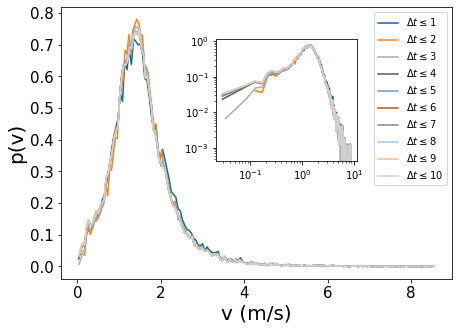

<ipython-input-14-91193f41c6ba>:657: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-14-91193f41c6ba>:658: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


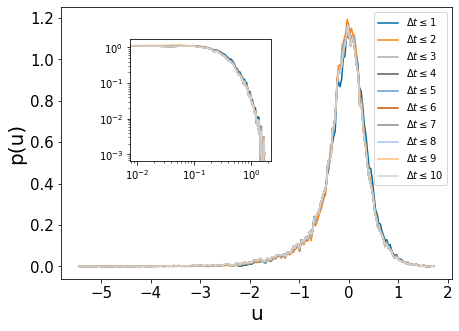

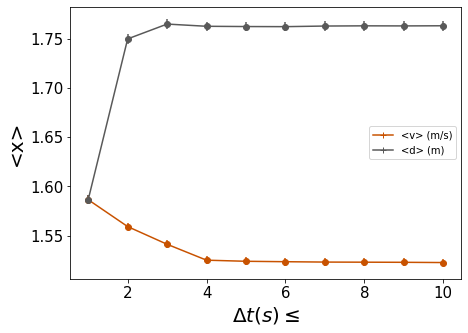

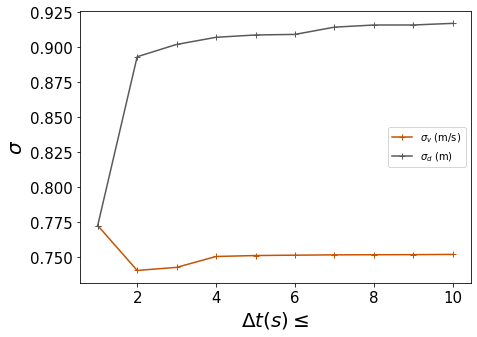

In [14]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)


v_At1=[]
v_At2=[]
v_At3=[]        # list of velocities an distances until At<=10s.
v_At4=[]
v_At5=[]
v_At6=[]
v_At7=[]
v_At8=[]
v_At9=[]
v_At10=[]
uu_At1=[]
uu_At2=[]
uu_At3=[]       
uu_At4=[]
uu_At5=[]
uu_At6=[]
uu_At7=[]
uu_At8=[]
uu_At9=[]
uu_At10=[]
d_At1=[]
d_At2=[]
d_At3=[]
d_At4=[]
d_At5=[]
d_At6=[]
d_At7=[]
d_At8=[]
d_At9=[]
d_At10=[]

for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    v=df2['v'][:-1].tolist()   # List of velocities and list of distances (we remove the last element which is NaN)
    d=df2['d'][:-1].tolist()
    
    mean_v=sum(v)/len(v)   # Compute the logarithm of the velocities for each user:  u=ln(v/<v>)
    u=[]
    for i in range(len(v)):
        u.append(np.log(v[i]/mean_v))
    
    velocities_At1=[]
    u_At1=[]
    velocities_At2=[]
    u_At2=[]
    velocities_At3=[]
    u_At3=[]
    velocities_At4=[]
    u_At4=[]
    velocities_At5=[]
    u_At5=[]
    velocities_At6=[]
    u_At6=[]
    velocities_At7=[]
    u_At7=[]
    velocities_At8=[]
    u_At8=[]
    velocities_At9=[]
    u_At9=[]
    velocities_At10=[]
    u_At10=[]
    
    distances_At1=[]
    distances_At2=[]
    distances_At3=[]
    distances_At4=[]
    distances_At5=[]
    distances_At6=[]
    distances_At7=[]
    distances_At8=[]
    distances_At9=[]
    distances_At10=[]
    
    for p in range(len(v)):       # Loop for each user, we store the velocities and distances that At<=1s then 2s,3s,4s...10s
        if df2['At'][p]<=1:
            velocities_At1.append(v[p])
            u_At1.append(u[p])
            distances_At1.append(d[p])
        if df2['At'][p]<=2:
            velocities_At2.append(v[p])
            u_At2.append(u[p])
            distances_At2.append(d[p])
        if df2['At'][p]<=3:
            velocities_At3.append(v[p])
            u_At3.append(u[p])
            distances_At3.append(d[p])
        if df2['At'][p]<=4:
            velocities_At4.append(v[p])
            u_At4.append(u[p])
            distances_At4.append(d[p])
        if df2['At'][p]<=5:
            velocities_At5.append(v[p])
            u_At5.append(u[p])
            distances_At5.append(d[p])
        if df2['At'][p]<=6:
            velocities_At6.append(v[p])
            u_At6.append(u[p])
            distances_At6.append(d[p])
        if df2['At'][p]<=7:
            velocities_At7.append(v[p])
            u_At7.append(u[p])
            distances_At7.append(d[p])
        if df2['At'][p]<=8:
            velocities_At8.append(v[p])
            u_At8.append(u[p])
            distances_At8.append(d[p])
        if df2['At'][p]<=9:
            velocities_At9.append(v[p])
            u_At9.append(u[p])
            distances_At9.append(d[p])
        if df2['At'][p]<=10:
            velocities_At10.append(v[p])
            u_At10.append(u[p])
            distances_At10.append(d[p])
            
    v_At1.extend(velocities_At1)      # Put all the lists for all users in an unique list
    v_At2.extend(velocities_At2)
    v_At3.extend(velocities_At3)
    v_At4.extend(velocities_At4)
    v_At5.extend(velocities_At5)
    v_At6.extend(velocities_At6)
    v_At7.extend(velocities_At7)
    v_At8.extend(velocities_At8)
    v_At9.extend(velocities_At9)
    v_At10.extend(velocities_At10)
    
    uu_At1.extend(u_At1)      # Put all the lists for all users in an unique list
    uu_At2.extend(u_At2)
    uu_At3.extend(u_At3)
    uu_At4.extend(u_At4)
    uu_At5.extend(u_At5)
    uu_At6.extend(u_At6)
    uu_At7.extend(u_At7)
    uu_At8.extend(u_At8)
    uu_At9.extend(u_At9)
    uu_At10.extend(u_At10)
    
    d_At1.extend(distances_At1)  # Put all the lists for all users in an unique list
    d_At2.extend(distances_At2)
    d_At3.extend(distances_At3)
    d_At4.extend(distances_At4)
    d_At5.extend(distances_At5)
    d_At6.extend(distances_At6)
    d_At7.extend(distances_At7)
    d_At8.extend(distances_At8)
    d_At9.extend(distances_At9)
    d_At10.extend(distances_At10)
    

    
# FOR EACH AT<=1,2,3,4,5,6,7,8,9,10. COMPUTE THE MEAN, STD, ERROR, QUARTILES...FOR THE VELOCITIES AND DISTANCES.
# THEN PLOT THE PDF AND <V> AND <D> AS A FUNCTION OF AT.
print('')
print('At<=1')
mean = sum(v_At1) / len(v_At1)
variance = sum([((x - mean) ** 2) for x in v_At1]) / len(v_At1)
res = variance ** 0.5
error=res/(len(v_At1)**0.5)

meand = sum(d_At1) / len(d_At1)
varianced = sum([((xd - meand) ** 2) for xd in d_At1]) / len(d_At1)
resd = varianced ** 0.5
errord=resd/(len(d_At1)**0.5)

print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(v_At1),'', 'max v=',max(v_At1))
print(len(v_At1))
q1=np.quantile(v_At1, 0.25)
q2=np.quantile(v_At1, 0.50)
q3=np.quantile(v_At1, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand, '', 'std=',resd, '', 'e=',errord)
print('min d=',min(d_At1),'', 'max d=',max(d_At1))
print(len(d_At1))
q1=np.quantile(d_At1, 0.25)
q2=np.quantile(d_At1, 0.50)
q3=np.quantile(d_At1, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')

print('')
print('-------------------------------------------------------------')
print('')


print('At<=2')
mean2 = sum(v_At2) / len(v_At2)
variance2 = sum([((x2 - mean2) ** 2) for x2 in v_At2]) / len(v_At2)
res2 = variance2 ** 0.5
error2=res2/(len(v_At2)**0.5)

meand2 = sum(d_At2) / len(d_At2)
varianced2 = sum([((xd2 - meand2) ** 2) for xd2 in d_At2]) / len(d_At2)
resd2 = varianced2 ** 0.5
errord2=resd2/(len(d_At2)**0.5)

print('<v>=',mean2, '', 'std=',res2, '', 'e=',error2)
print('min v=',min(v_At2),'', 'max v=',max(v_At2))
print(len(v_At2))
q1=np.quantile(v_At2, 0.25)
q2=np.quantile(v_At2, 0.50)
q3=np.quantile(v_At2, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand2, '', 'std=',resd2, '', 'e=',errord2)
print('min d=',min(d_At2),'', 'max d=',max(d_At2))
print(len(d_At2))
q1=np.quantile(d_At2, 0.25)
q2=np.quantile(d_At2, 0.50)
q3=np.quantile(d_At2, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')

print('')
print('-------------------------------------------------------------')
print('')

print('At<=3')
mean3 = sum(v_At3) / len(v_At3)
variance3 = sum([((x3 - mean3) ** 2) for x3 in v_At3]) / len(v_At3)
res3 = variance3 ** 0.5
error3=res3/(len(v_At3)**0.5)

meand3 = sum(d_At3) / len(d_At3)
varianced3 = sum([((xd3 - meand3) ** 2) for xd3 in d_At3]) / len(d_At3)
resd3 = varianced3 ** 0.5
errord3=resd3/(len(d_At3)**0.5)

print('<v>=',mean3, '', 'std=',res3, '', 'e=',error3)
print('min v=',min(v_At3),'', 'max v=',max(v_At3))
print(len(v_At3))
q1=np.quantile(v_At3, 0.25)
q2=np.quantile(v_At3, 0.50)
q3=np.quantile(v_At3, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand3, '', 'std=',resd3, '', 'e=',errord3)
print('min d=',min(d_At3),'', 'max d=',max(d_At3))
print(len(d_At3))
q1=np.quantile(d_At3, 0.25)
q2=np.quantile(d_At3, 0.50)
q3=np.quantile(d_At3, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')

print('')
print('-------------------------------------------------------------')
print('')

print('At<=4')
mean4 = sum(v_At4) / len(v_At4)
variance4 = sum([((x4 - mean4) ** 2) for x4 in v_At4]) / len(v_At4)
res4 = variance4 ** 0.5
error4=res4/(len(v_At4)**0.5)

meand4 = sum(d_At4) / len(d_At4)
varianced4 = sum([((xd4 - meand4) ** 2) for xd4 in d_At4]) / len(d_At4)
resd4 = varianced4 ** 0.5
errord4=resd4/(len(d_At4)**0.5)

print('<v>=',mean4, '', 'std=',res4, '', 'e=',error4)
print('min v=',min(v_At4),'', 'max v=',max(v_At4))
print(len(v_At4))
q1=np.quantile(v_At4, 0.25)
q2=np.quantile(v_At4, 0.50)
q3=np.quantile(v_At4, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand4, '', 'std=',resd4, '', 'e=',errord4)
print('min d=',min(d_At4),'', 'max d=',max(d_At4))
print(len(d_At4))
q1=np.quantile(d_At4, 0.25)
q2=np.quantile(d_At4, 0.50)
q3=np.quantile(d_At4, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')

print('')
print('-------------------------------------------------------------')
print('')

print('At<=5')
mean5 = sum(v_At5) / len(v_At5)
variance5 = sum([((x5 - mean5) ** 2) for x5 in v_At5]) / len(v_At5)
res5 = variance5 ** 0.5
error5=res5/(len(v_At5)**0.5)

meand5 = sum(d_At5) / len(d_At5)
varianced5 = sum([((xd5 - meand5) ** 2) for xd5 in d_At5]) / len(d_At5)
resd5 = varianced5 ** 0.5
errord5=resd5/(len(d_At5)**0.5)

print('<v>=',mean5, '', 'std=',res5, '', 'e=',error5)
print('min v=',min(v_At5),'', 'max v=',max(v_At5))
print(len(v_At5))
q1=np.quantile(v_At5, 0.25)
q2=np.quantile(v_At5, 0.50)
q3=np.quantile(v_At5, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand5, '', 'std=',resd5, '', 'e=',errord5)
print('min d=',min(d_At5),'', 'max d=',max(d_At5))
print(len(d_At5))
q1=np.quantile(d_At5, 0.25)
q2=np.quantile(d_At5, 0.50)
q3=np.quantile(d_At5, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')

print('')
print('-------------------------------------------------------------')
print('')


print('At<=6')
mean6 = sum(v_At6) / len(v_At6)
variance6 = sum([((x6 - mean6) ** 2) for x6 in v_At6]) / len(v_At6)
res6 = variance6 ** 0.5
error6=res6/(len(v_At6)**0.5)

meand6 = sum(d_At6) / len(d_At6)
varianced6 = sum([((xd6 - meand6) ** 2) for xd6 in d_At6]) / len(d_At6)
resd6 = varianced6 ** 0.5
errord6=resd6/(len(d_At6)**0.5)

print('<v>=',mean6, '', 'std=',res6, '', 'e=',error6)
print('min v=',min(v_At6),'', 'max v=',max(v_At6))
print(len(v_At6))
q1=np.quantile(v_At6, 0.25)
q2=np.quantile(v_At6, 0.50)
q3=np.quantile(v_At6, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand6, '', 'std=',resd6, '', 'e=',errord6)
print('min d=',min(d_At6),'', 'max d=',max(d_At6))
print(len(d_At6))
q1=np.quantile(d_At6, 0.25)
q2=np.quantile(d_At6, 0.50)
q3=np.quantile(d_At6, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')

print('')
print('-------------------------------------------------------------')
print('')


print('At<=7')
mean7 = sum(v_At7) / len(v_At7)
variance7 = sum([((x7 - mean7) ** 2) for x7 in v_At7]) / len(v_At7)
res7 = variance7 ** 0.5
error7=res7/(len(v_At7)**0.5)

meand7 = sum(d_At7) / len(d_At7)
varianced7 = sum([((xd7 - meand7) ** 2) for xd7 in d_At7]) / len(d_At7)
resd7 = varianced7 ** 0.5
errord7=resd7/(len(d_At7)**0.5)

print('<v>=',mean7, '', 'std=',res7, '', 'e=',error7)
print('min v=',min(v_At7),'', 'max v=',max(v_At7))
print(len(v_At7))
q1=np.quantile(v_At7, 0.25)
q2=np.quantile(v_At7, 0.50)
q3=np.quantile(v_At7, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand7, '', 'std=',resd7, '', 'e=',errord7)
print('min d=',min(d_At7),'', 'max d=',max(d_At7))
print(len(d_At7))
q1=np.quantile(d_At7, 0.25)
q2=np.quantile(d_At7, 0.50)
q3=np.quantile(d_At7, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')


print('')
print('-------------------------------------------------------------')
print('')

print('At<=8')
mean8 = sum(v_At8) / len(v_At8)
variance8 = sum([((x8 - mean8) ** 2) for x8 in v_At8]) / len(v_At8)
res8 = variance8 ** 0.5
error8=res8/(len(v_At8)**0.5)

meand8 = sum(d_At8) / len(d_At8)
varianced8 = sum([((xd8 - meand8) ** 2) for xd8 in d_At8]) / len(d_At8)
resd8 = varianced8 ** 0.5
errord8=resd8/(len(d_At8)**0.5)

print('<v>=',mean8, '', 'std=',res8, '', 'e=',error8)
print('min v=',min(v_At8),'', 'max v=',max(v_At8))
print(len(v_At8))
q1=np.quantile(v_At8, 0.25)
q2=np.quantile(v_At8, 0.50)
q3=np.quantile(v_At8, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand8, '', 'std=',resd8, '', 'e=',errord8)
print('min d=',min(d_At8),'', 'max d=',max(d_At8))
print(len(d_At8))
q1=np.quantile(d_At8, 0.25)
q2=np.quantile(d_At8, 0.50)
q3=np.quantile(d_At8, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')


print('')
print('-------------------------------------------------------------')
print('')

print('At<=9')
mean9 = sum(v_At9) / len(v_At9)
variance9 = sum([((x9 - mean9) ** 2) for x9 in v_At9]) / len(v_At9)
res9 = variance9 ** 0.5
error9=res9/(len(v_At9)**0.5)

meand9 = sum(d_At9) / len(d_At9)
varianced9 = sum([((xd9 - meand9) ** 2) for xd9 in d_At9]) / len(d_At9)
resd9 = varianced9 ** 0.5
errord9=resd9/(len(d_At9)**0.5)

print('<v>=',mean9, '', 'std=',res9, '', 'e=',error9)
print('min v=',min(v_At9),'', 'max v=',max(v_At9))
print(len(v_At9))
q1=np.quantile(v_At9, 0.25)
q2=np.quantile(v_At9, 0.50)
q3=np.quantile(v_At9, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')
print('<d>=',meand9, '', 'std=',resd9, '', 'e=',errord9)
print('min d=',min(d_At9),'', 'max d=',max(d_At9))
print(len(d_At9))
q1=np.quantile(d_At9, 0.25)
q2=np.quantile(d_At9, 0.50)
q3=np.quantile(d_At9, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')


print('')
print('-------------------------------------------------------------')
print('')

print('At<=10')
mean10 = sum(v_At10) / len(v_At10)
variance10 = sum([((x10 - mean10) ** 2) for x10 in v_At10]) / len(v_At10)
res10 = variance10 ** 0.5
error10=res10/(len(v_At10)**0.5)

meand10 = sum(d_At10) / len(d_At10)
varianced10 = sum([((xd10 - meand10) ** 2) for xd10 in d_At10]) / len(d_At10)
resd10= varianced10 ** 0.5
errord10=resd10/(len(d_At10)**0.5)

print('<v>=',mean10, '', 'std=',res10, '', 'e=',error10)
print('min v=',min(v_At10),'', 'max v=',max(v_At10))
print(len(v_At10))
q1=np.quantile(v_At10, 0.25)
q2=np.quantile(v_At10, 0.50)
q3=np.quantile(v_At10, 0.75)
print('q1 (25%):',q1,'m/s')
print('q2 (50%):',q2,'m/s')
print('q3 (75%):',q3,'m/s')

print('<d>=',meand10, '', 'std=',resd10, '', 'e=',errord10)
print('min d=',min(d_At10),'', 'max d=',max(d_At10))
print(len(d_At10))
q1=np.quantile(d_At10, 0.25)
q2=np.quantile(d_At10, 0.50)
q3=np.quantile(d_At10, 0.75)
print('q1 (25%):',q1,'m')
print('q2 (50%):',q2,'m')
print('q3 (75%):',q3,'m')

print('')
print('-------------------------------------------------------------')
print('')
print('')



#PDF OF VELOCITIES V  FOR EACH AT<=1,2,3... IN THE SAME FIGURE

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.32,1-0.55,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(v_At1)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#006BA4',label=r'$\Delta t\leq 1$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#006BA4',label=r'$\Delta t\leq 1$')    #plot pdf

numpy_matrix = np.array(v_At2)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-',c='#FF800E', label=r'$\Delta t\leq 2$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#FF800E',label=r'$\Delta t\leq 2$')
        
numpy_matrix = np.array(v_At3)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#ABABAB',label=r'$\Delta t\leq 3$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#ABABAB',label=r'$\Delta t\leq 3$')
        
numpy_matrix = np.array(v_At4)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-',  c='#595959',label=r'$\Delta t\leq 4$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#595959', label=r'$\Delta t\leq 4$')
        
numpy_matrix = np.array(v_At5)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#5F9ED1', label=r'$\Delta t\leq 5$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#5F9ED1', label=r'$\Delta t\leq 5$')

numpy_matrix = np.array(v_At6)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#C85200',label=r'$\Delta t\leq 6$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#C85200',label=r'$\Delta t\leq 6$')

numpy_matrix = np.array(v_At7)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#898989',label=r'$\Delta t\leq 7$')    #plot pdf
axins2.plot(bin_centres, counts, '-',c='#898989', label=r'$\Delta t\leq 7$')

numpy_matrix = np.array(v_At8)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#A2C8EC',label=r'$\Delta t\leq 8$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#A2C8EC',label=r'$\Delta t\leq 8$')

numpy_matrix = np.array(v_At9)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-',c='#FFBC79',  label=r'$\Delta t\leq 9$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#FFBC79', label=r'$\Delta t\leq 9$')

numpy_matrix = np.array(v_At10)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#CFCFCF',label=r'$\Delta t\leq 10$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#CFCFCF',label=r'$\Delta t\leq 10$')
    

ax.set_xlabel('v (m/s)',fontsize=20)
ax.set_ylabel('p(v)',fontsize=20)
ax.legend()

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
#axins2.set_xlim(0.65,10)

ax.tick_params(labelsize=15)

plt.show()



#PDF OF VELOCITIES  U FOR EACH AT<=1,2,3... IN THE SAME FIGURE

fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.1,1-0.55,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(uu_At1)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#006BA4',label=r'$\Delta t\leq 1$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#006BA4',label=r'$\Delta t\leq 1$')    #plot pdf

numpy_matrix = np.array(uu_At2)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-',c='#FF800E', label=r'$\Delta t\leq 2$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#FF800E',label=r'$\Delta t\leq 2$')
        
numpy_matrix = np.array(uu_At3)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#ABABAB',label=r'$\Delta t\leq 3$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#ABABAB',label=r'$\Delta t\leq 3$')
        
numpy_matrix = np.array(uu_At4)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-',  c='#595959',label=r'$\Delta t\leq 4$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#595959', label=r'$\Delta t\leq 4$')
        
numpy_matrix = np.array(uu_At5)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#5F9ED1', label=r'$\Delta t\leq 5$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#5F9ED1', label=r'$\Delta t\leq 5$')

numpy_matrix = np.array(uu_At6)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#C85200',label=r'$\Delta t\leq 6$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#C85200',label=r'$\Delta t\leq 6$')

numpy_matrix = np.array(uu_At7)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#898989',label=r'$\Delta t\leq 7$')    #plot pdf
axins2.plot(bin_centres, counts, '-',c='#898989', label=r'$\Delta t\leq 7$')

numpy_matrix = np.array(uu_At8)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#A2C8EC',label=r'$\Delta t\leq 8$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#A2C8EC',label=r'$\Delta t\leq 8$')

numpy_matrix = np.array(uu_At9)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-',c='#FFBC79',  label=r'$\Delta t\leq 9$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#FFBC79', label=r'$\Delta t\leq 9$')

numpy_matrix = np.array(uu_At10)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,'auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '-', c='#CFCFCF',label=r'$\Delta t\leq 10$')    #plot pdf
axins2.plot(bin_centres, counts, '-', c='#CFCFCF',label=r'$\Delta t\leq 10$')

ax.set_xlabel('u',fontsize=20)
ax.set_ylabel('p(u)',fontsize=20)
ax.legend()

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
#axins2.set_xlim(0.65,10)

ax.tick_params(labelsize=15)

plt.show()




print('')




#PLOT OF <V> AND <D> FOR EACH AT<=X seconds.

v_avg=[mean,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10]
d_avg=[meand,meand2,meand3,meand4,meand5,meand6,meand7,meand8,meand9,meand10]
error_v=[error,error2,error3,error4,error5,error6,error7,error8,error9,error10]
error_d=[errord,errord2,errord3,errord4,errord5,errord6,errord7,errord8,errord9,errord10]
std_v=[res,res2,res3,res4,res5,res6,res7,res8,res9,res10]
std_d=[resd,resd2,resd3,resd4,resd5,resd6,resd7,resd8,resd9,resd10]
At=[1,2,3,4,5,6,7,8,9,10]

fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(At, v_avg, '+-',c='#C85200',label='<v> (m/s)') 
ax.plot(At, d_avg, '+-',c='#595959', label='<d> (m)')
ax.errorbar(At,v_avg, yerr=error_v,c='#C85200', fmt='o')
ax.errorbar(At,d_avg, yerr=error_d, c='#595959',fmt='o')
ax.set_xlabel(r'$\Delta t (s) \leq $',fontsize=20)
ax.set_ylabel('<x>',fontsize=20)
ax.tick_params(labelsize=15)
ax.legend(loc='center right')

plt.show()


fig, ax = plt.subplots(figsize=(7,5)) 
ax.plot(At, std_v, '+-',c='#C85200',label=r'$\sigma_{v}$ (m/s)') 
ax.plot(At, std_d, '+-', c='#595959',label=r'$\sigma_{d}$ (m)')
#ax.errorbar(At,v_avg, yerr=error_v, fmt='o')
#ax.errorbar(At,d_avg, yerr=error_d, fmt='o')
ax.set_xlabel(r'$\Delta t (s) \leq $',fontsize=20)
ax.set_ylabel(r'$\sigma$',fontsize=20)
ax.tick_params(labelsize=15)
ax.legend(loc='center right')

plt.show()





